**Objetivo**

El objetivo de este taller es evaluar las capacidades del estudiante para aplicar diferentes técnicas de experimentación para la construcción de un modelo de clasificación que minimice tanto como sea posible el error de predicción. Adicionalmente, se espera que estos modelos sean disponibilizados mediante una API REST para que puedan ser integrados a cualquier producto de datos. No olvide realizar los ejercicios previos pertinentes respecto a la preparación y entendimiento de los datos.

**Contexto de negocio**

El área de fidelización de una empresa de telecomunicaciones tiene como una de sus metas disminuir la tasa de churn (abandono) por parte de sus clientes. Por esta razón, desea construir modelos de machine learning que permitan predecir si un cliente es propenso abandonar los servicios que actualmente tiene contratados con la empresa. Una vez construidos, estos modelos deben ser disponibilizados a través de una API REST que pueda ser consumida por la plataforma que es usada por los asesores de call center usando dicha predicción para ofrecer nuevos productos o servicios a los clientes más propensos al abandono.

## **1. Diccionario de datos** <a class="anchor" id="section1"></a>


| Variables            | Descripción                                                                                                        |
|------------------|--------------------------------------------------------------------------------------------------------------------|
| customerID       | Customer ID                                                                                                        |
| gender           | Whether the customer is a male or a female                                                                         |
| SeniorCitizen    | Whether the customer is a senior citizen or not (1, 0)                                                             |
| Partner          | Whether the customer has a partner or not (Yes, No)                                                                |
| Dependents       | Whether the customer has dependents or not (Yes, No)                                                               |
| tenure           | Number of months the customer has stayed with the company                                                          |
| PhoneService     | Whether the customer has a phone service or not (Yes, No)                                                          |
| MultipleLines    | Whether the customer has multiple lines or not (Yes, No, No phone service)                                         |
| InternetService  | Customer’s internet service provider (DSL, Fiber optic, No)                                                        |
| OnlineSecurity   | Whether the customer has online security or not (Yes, No, No                                                       |
| OnlineBackup     | Whether the customer has online backup or not (Yes, No, No internet service)                                       |
| DeviceProtection | Whether the customer has device protection or not (Yes, No, No internet service)                                   |
| TechSupport      | Whether the customer has tech support or not (Yes, No, No internet service)                                        |
| StreamingTV      | Whether the customer has streaming TV or not (Yes, No, No internet service)                                        |
| StreamingMovies  | Whether the customer has streaming movies or not (Yes, No, No internet service)                                    |
| Contract         | The contract term of the customer (Month-to-month, One year, Two year)                                             |
| PaperlessBilling | Whether the customer has paperless billing or not (Yes, No)                                                        |
| PaymentMethod    | The customer’s payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic)) |
| MonthlyCharges   | The amount charged to the customer monthly                                                                         |
| TotalCharges     | The total amount charged to the customer                                                                           |
| Churn            | Whether the customer churned or not (Yes or No)                                                                    

## **2. Importación de librerias** <a class="anchor" id="section2"></a>

Se debe realizar la importación de librerías y múltiples paquetes para poder acceder a funciones para la construcción gráficos y modelos en la ejecución de procedimientos metodológicos de aprendizaje automático, entre ellas tenemos numpy, pandas, matplotlib.pyplot, sklearn, entre otras.
  

In [1]:
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from flask import Flask, request, jsonify
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import joblib


## **3. Carga de datos** <a class="anchor" id="section3"></a>

Utilizaremos el conjunto de datos llamado churn_historic.json y churn_future.json, para realizar entrenamientos de modelos para clasificación. Cargaremos el conjunto de datos y haremos una exploración de datos.

In [2]:
# Cargar los datos
churned_historic = pd.read_json('churn_historic.json')
churned_future = pd.read_json('churn_future.json')


# Eliminar la columna customerID
#churned_historic = churned_historic.drop(columns=['customerID'])
#churned_future = churned_future.drop(columns=['customerID'])

# Explorar los primeros registros
print(churned_historic.head())
#print(churned_future.head())



# Verificar valores faltantes
#print(churned_historic.isnull().sum())


   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  5386-THSLQ  Female              1     Yes         No      66           No   
4  3192-NQECA    Male              0     Yes         No      68          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL             No  ...              Yes   
4               Yes     Fiber optic             No  ...              Yes   

  TechSupport StreamingTV StreamingMovies        Contract Pape

## **3.1. Descripción del conjunto de datos**

## **3.1 Cargar el conjunto de datos**
---

Se determinan las dimensiones de la base de datos, es decir, se realiza el conteo de registros (Filas) y variables(Columnas), así como el tipo de variable de cada una de ellas, la cantidad de valores únicos, la cantidad de registros duplicados y porcentajes de nulidad.

In [3]:
def caracteristicas_dtf(name):
    print(f"Las dimensiones del conjunto de datos son: {name.shape}, correspondiente a {name.shape[0]} registros y {name.shape[1]} columnas (variables)")
    print()
    print("El listado de variables para el conjunto de datos es:")
    print(name.keys())
    print()
    print("Los tipos de variable leído del conjunto de datos son:")
    print()
    print(name.info())
    print()
    print("La cantidad de valores únicos y porcentaje de nulidad por variable son:")
    print()
    for col in name.columns:
        print(f"{col} - tiene {name[col].nunique()} valores únicos, {name[col].isnull().sum()} valores vacios correspondiente a {round(np.mean(name[col].isnull())*100)}% de datos nulos")
    print()
    print(f"El conjunto de datos tiene {name.duplicated().sum()} registros (filas) duplicados.")
    print()
    duplicados = name[name.duplicated()].iloc[:,:4]
    print(duplicados)

In [4]:
caracteristicas_dtf(churned_historic)

Las dimensiones del conjunto de datos son: (6000, 21), correspondiente a 6000 registros y 21 columnas (variables)

El listado de variables para el conjunto de datos es:
Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

Los tipos de variable leído del conjunto de datos son:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        6000 non-null   object 
 1   gender            6000 non-null   object 
 2   SeniorCitizen     6000 non-null   int64  
 3   Partner           6000 non-null   object 
 4  

In [5]:
# Registros duplicados
churned_historic[churned_historic.duplicated(keep=False)]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn


Se observa que el dataset no contiene registros duplicados, que el porcentaje de valores faltantes para la mayoria de variables es de 0% por lo cual no se tienen registros nulos o vacíos, excepto por la variable"TotalCharges" que presenta 10 valores nulos, adicional es leida como tipo object, por tanto, debe ser transformada dado que esta variable es de tipo numérico. Adicional se ha de realizar imputación de datos para que la variable este sin nulos.

La variable SeniorCitizen corresponde a la clasificación si se es adulto mayor o no la cual debe ser cualitativa y esta leída como int, por lo que se ha de cambiar el tipo de variable object.

In [6]:
churned_historic['TotalCharges'] = pd.to_numeric(churned_historic['TotalCharges'], errors='coerce')

In [7]:
churned_historic['SeniorCitizen'] = churned_historic['SeniorCitizen'].apply(lambda _:str(_))

Se realiza revisión de los valores únicos para las variables cualitativas

In [8]:
def valores_unicos_dtf(name):
    for col in name.columns:
        if name[col].dtype.name in ['object', 'category']:
            print(f'La variable {col} tiene {name[col].nunique()} valores únicos.')
            print()
            print(name[col].value_counts())
            print(end="\n")

In [9]:
valores_unicos_dtf(churned_historic)

La variable customerID tiene 6000 valores únicos.

7590-VHVEG    1
5181-OABFK    1
9356-AXGMP    1
5176-OLSKT    1
7508-DQAKK    1
             ..
3722-WPXTK    1
4083-BFNYK    1
6486-LHTMA    1
8231-BSWXX    1
7758-XKCBS    1
Name: customerID, Length: 6000, dtype: int64

La variable gender tiene 2 valores únicos.

Male      3049
Female    2951
Name: gender, dtype: int64

La variable SeniorCitizen tiene 2 valores únicos.

0    5039
1     961
Name: SeniorCitizen, dtype: int64

La variable Partner tiene 2 valores únicos.

No     3097
Yes    2903
Name: Partner, dtype: int64

La variable Dependents tiene 2 valores únicos.

No     4189
Yes    1811
Name: Dependents, dtype: int64

La variable PhoneService tiene 2 valores únicos.

Yes    5410
No      590
Name: PhoneService, dtype: int64

La variable MultipleLines tiene 3 valores únicos.

No                  2883
Yes                 2527
No phone service     590
Name: MultipleLines, dtype: int64

La variable InternetService tiene 3 valores únic

## **3.2. Análisis Univariado**

**Variables Categóricas**

Se procede a realizar los gráficos de barras para visualizar la   distribución porcentual para las correspondientes variables categóricas.

In [10]:
categorical_columns = churned_historic.select_dtypes(include=['object', 'category']).columns.drop('customerID')

In [11]:
def plot_count_plot_percentages(df, column):
  ax = sns.countplot(data=df, x=column, color="teal")
  ax.set(title = 'Distribución de la variable ' + column)
  total = float(len(df[column]))
  for p in ax.patches:
      percentage = '{:.1f}%'.format(100 * p.get_height()/total)
      x = p.get_x() + p.get_width()
      y = p.get_height()
      ax.annotate(percentage, (x, y),ha='center')
  plt.show()

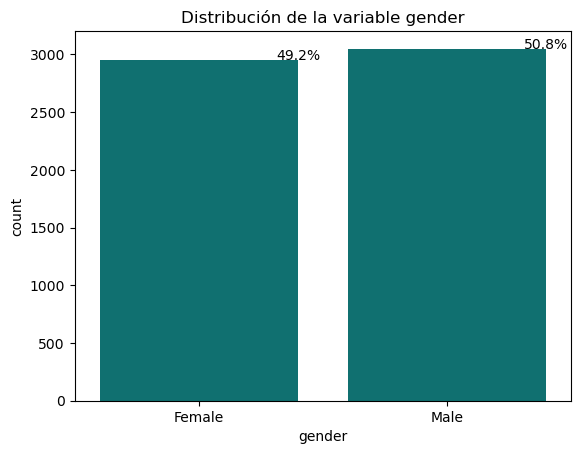

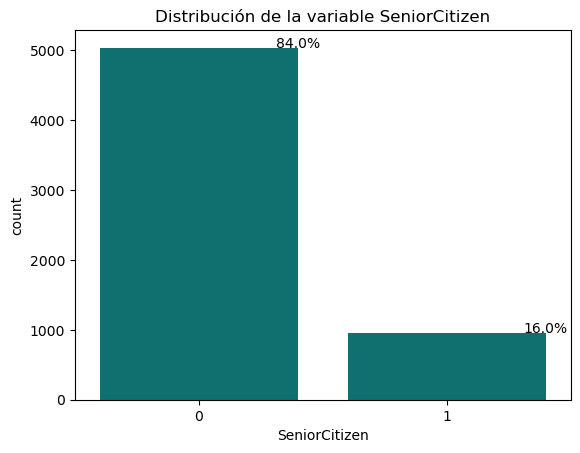

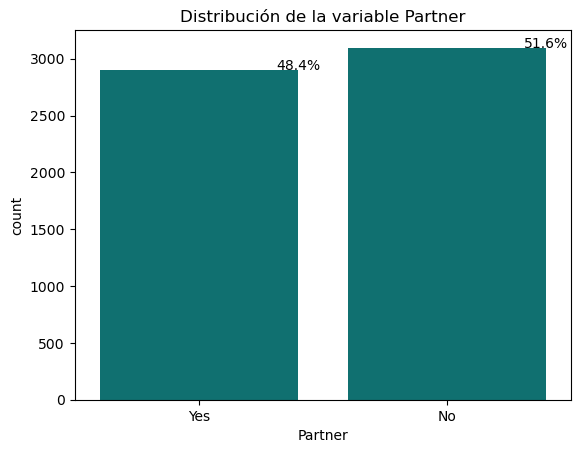

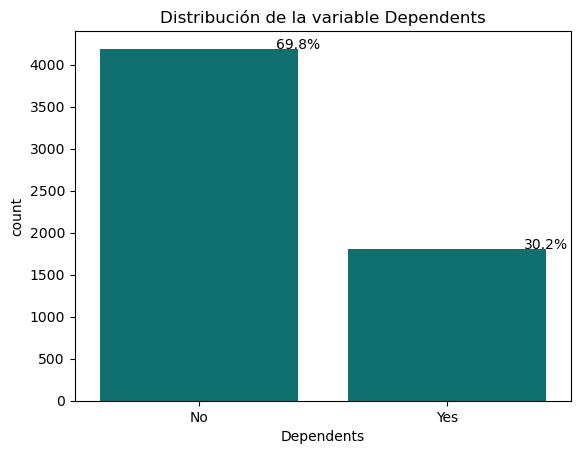

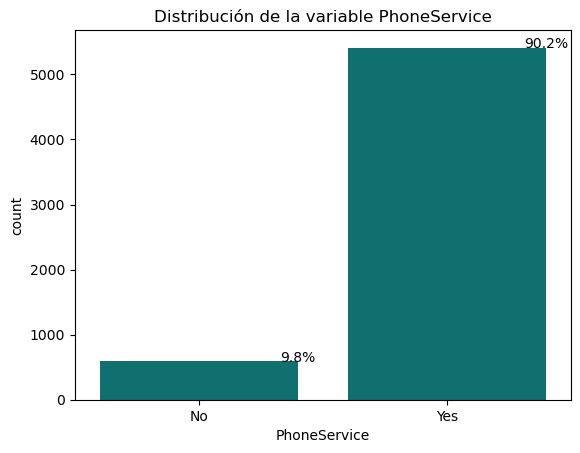

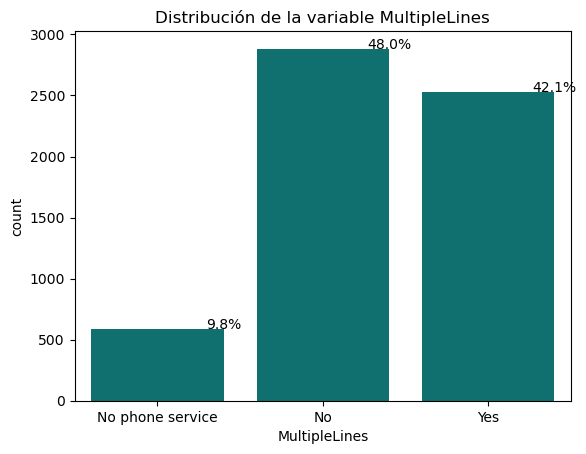

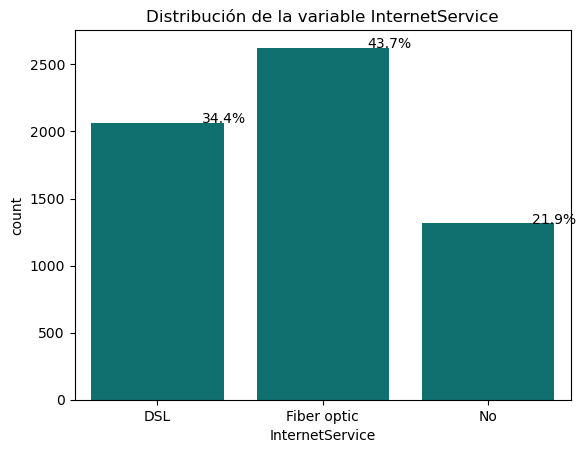

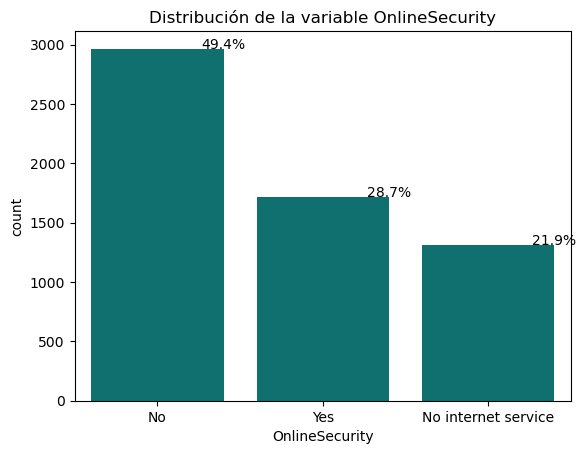

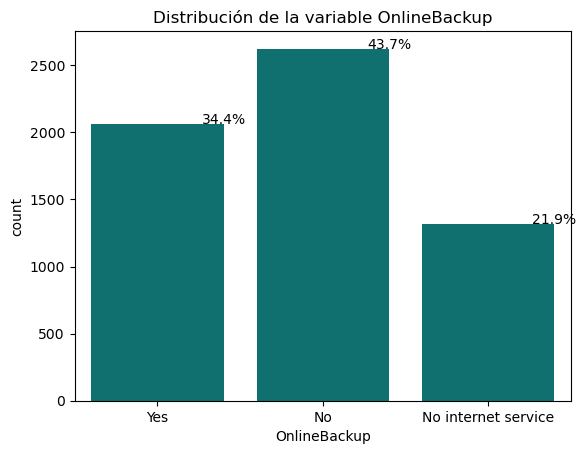

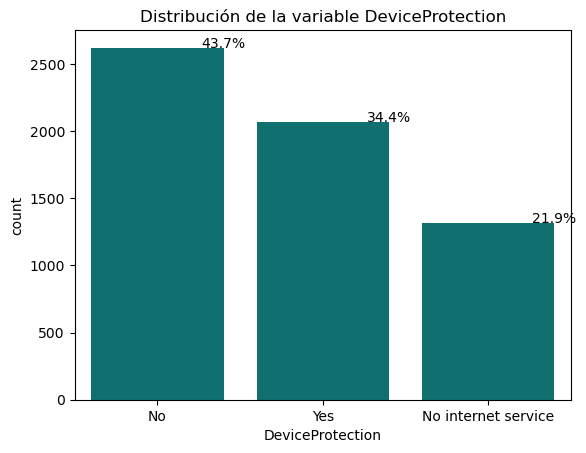

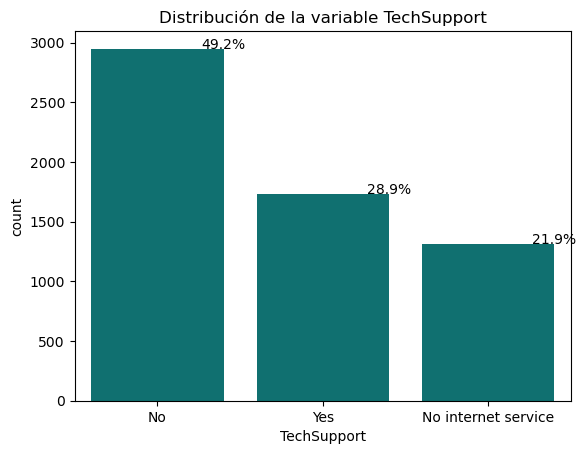

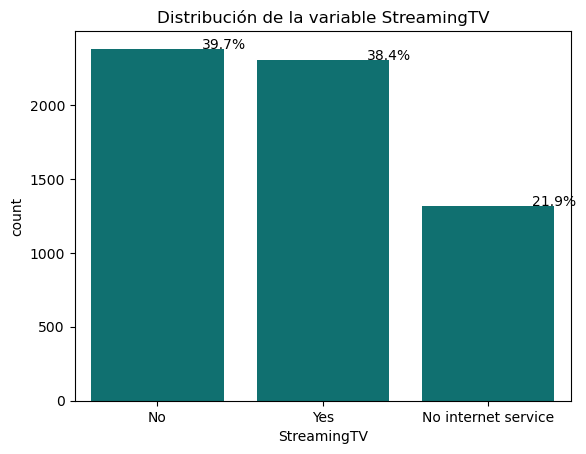

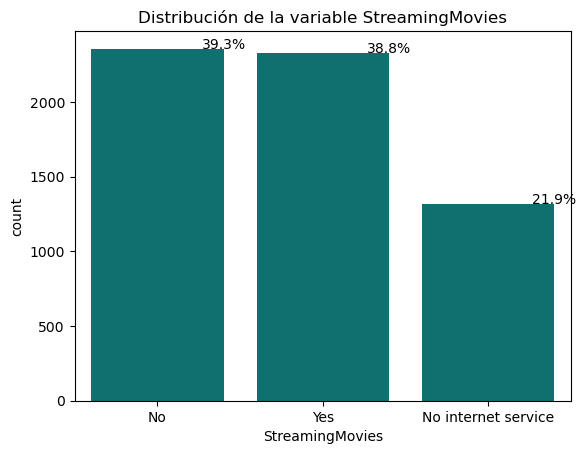

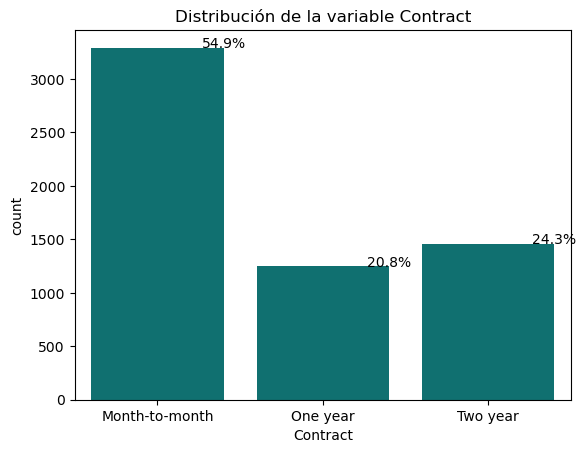

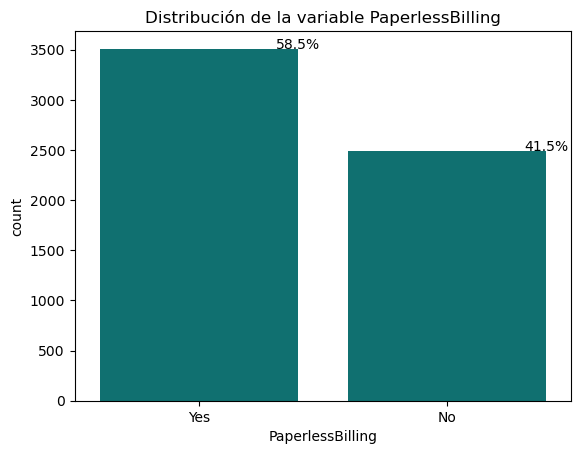

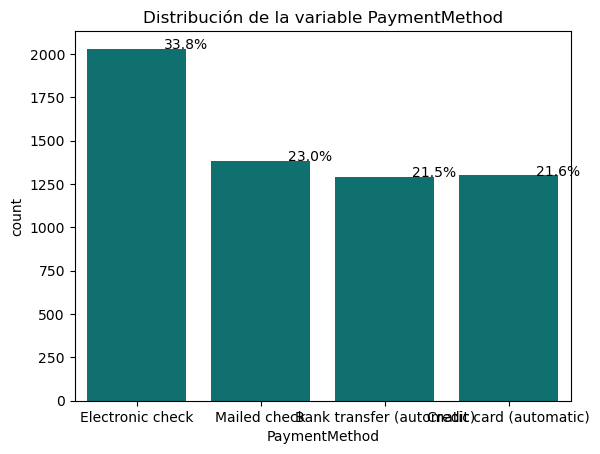

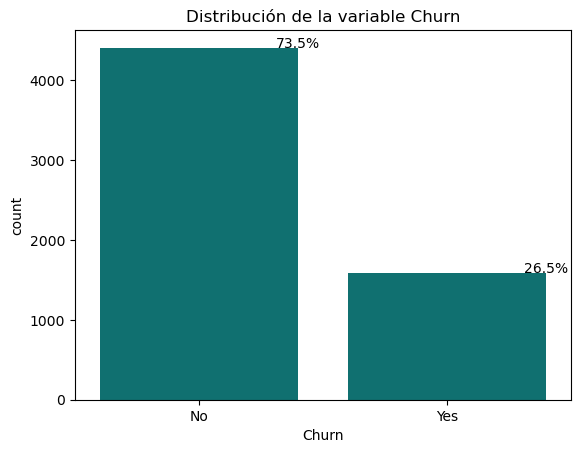

In [12]:
# Iterar sobre las variables categóricas
for i, var in enumerate(categorical_columns):
    # Aplicar la función plot_count_plot_percentages
    plot_count_plot_percentages(churned_historic, var)

De las anteriores graficas podemos evidenciar lo siguiente:

- El 50.8% de los clientes son hombres.
- El 73.5% de los clientes no son adultos mayores.
- El 84% de los clientes no son jubilados.
- El 51.6% de los clientes no son Partner.
- El 69.8% de los clientes no tiene dependientes.
- El 90.2% de los clientes tiene un servicio de teléfono.
- El 48% de los usuarios no tienen múltiples líneas, mientras que el 42.1% si las tiene.
- Los servicios de internet que ofrece la compañía son DSL y fibra óptica con una representación de 34.4% y 43.7% correspondientemente.
- El servicio de seguridad online se ofrece a clientes con internet, sólo el 28.7% de los clientes tienen este servicio.
- El servicio de backup online se ofrece a clientes con internet, sólo el 34.4% de los clientes tienen este servicio.
- El servicio de protección de dispositivos se ofrece a clientes con internet, sólo el 34.4% de los clientes tienen este servicio.
- El servicio de soporte técnico se ofrece a clientes con internet, sólo el 28.9% de los clientes tienen este servicio.
- El servicio de TV por streaming sólo lo tienen disponible el 38.4%.
- El servicio de películas streaming sólo lo tienen disponible el 38.8%.
- Sólo el 24.3% de los clientes tiene un contrato a 2 años.
- Sólo el 58.5% de los clientes tienen facturación electrónica.
- El método de pago que los clientes más utilizan es el cheque electrónico con un 33.8%, seguido de cheque enviado por correo 23%, transferencia bancaria (automática) 21.5% y por último la tarjeta de crédito (automática) 21.6%.
- El porcentaje de clientes que están en estado abandonado corresponden al 73.5%.

**Variables Numéricas**

 Se procede a realizar la visualización para las correspondientes variables numéricas.

In [13]:
numeric_columns = churned_historic.select_dtypes(exclude=['object', 'category']).columns

In [14]:
def plot_hist_box(data_df, column):
  fig, axs = plt.subplots(1, 2, figsize=(10, 5))
  sns.histplot(data_df[column], color="gold", ax=axs[0]).set(title='Histograma de ' + column)
  sns.boxplot(data=data_df, x=column, ax=axs[1]).set(title='Box Plot de ' + column)

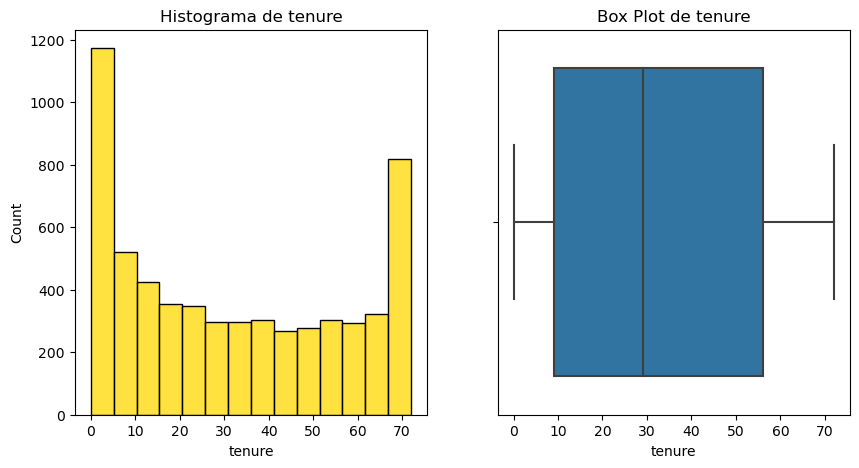

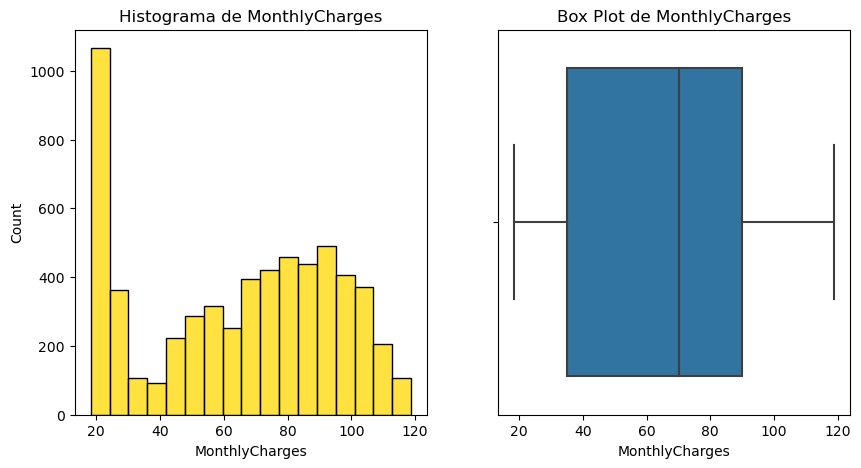

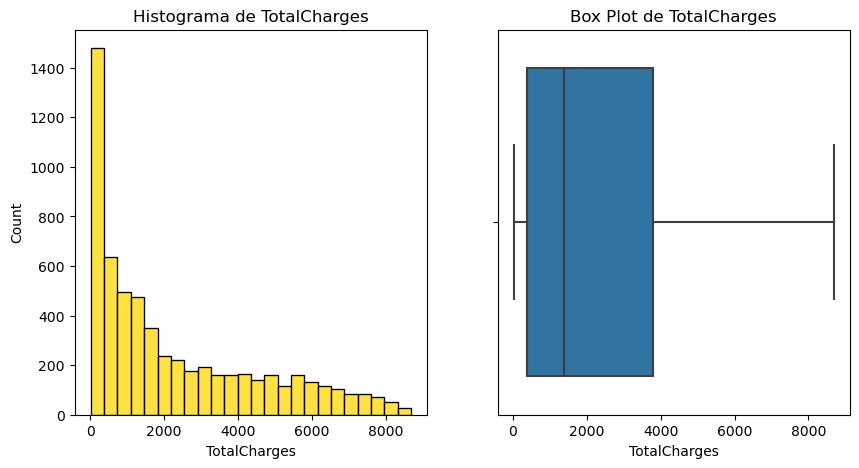

In [15]:
# Iterar sobre las variables numéricas
for i, var in enumerate(numeric_columns):
    # Aplicar la función plot_hist_box
    plot_hist_box(churned_historic, var)

In [16]:
# Resumen estadístico
#print(churned_historic.describe())
churned_historic[numeric_columns].describe()

,tenure,MonthlyCharges,TotalCharges
count,6000.000000,6000.000000,5990.000000
mean,32.320667,64.607233,2281.988155
std,24.637296,30.195382,2274.401428
min,0.000000,18.250000,18.800000
25%,9.000000,35.000000,389.337500
50%,29.000000,70.300000,1391.950000
75%,56.000000,89.850000,3803.725000
max,72.000000,118.750000,8684.800000


- La variable tenure se distribuye tomando valores discretos entre 0 y 72 meses, la media es de 32.3 meses y de acuerdo al diagrama de cajas la variable no presenta valores atípicos.
- La variable MonthlyCharges se distribuye entre 18.6 y 118 USDs, la media es de 64.14, acorde con el diagrama de cajas no presenta valores atípicos.
- La variable TotalCharges se distribuye entre 18.8 y 8684.8, la media es de 2278.40, acorde al diagrama de cajas no presenta valores atípicos.

## **3.3. Análisis Bivariado**

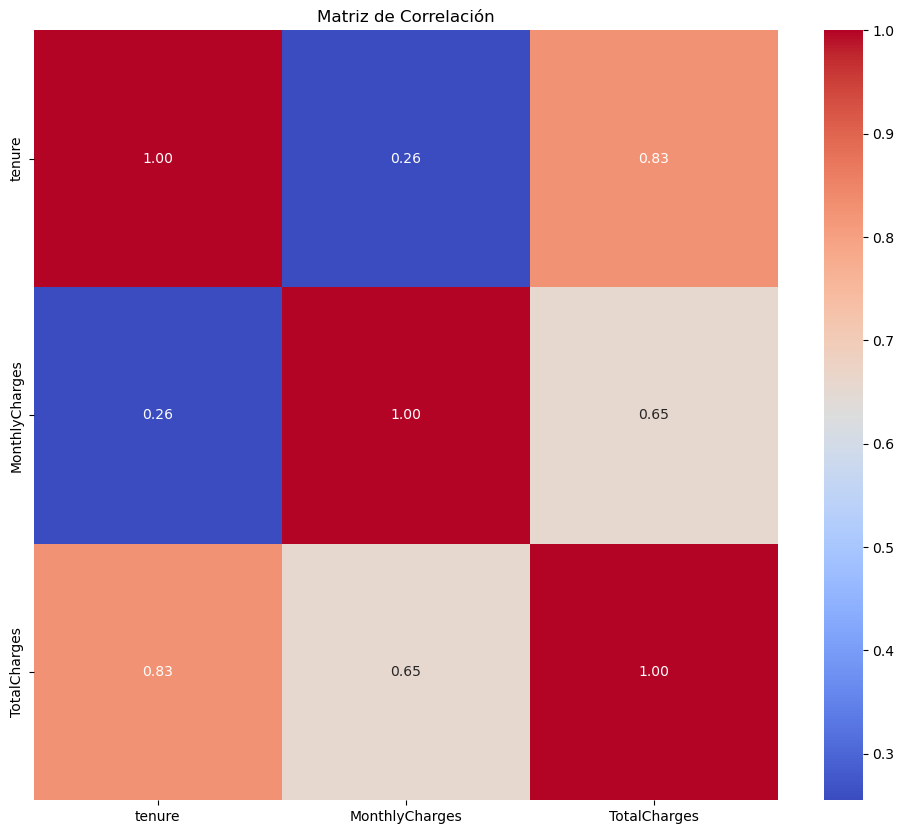

In [17]:
# correlaciones
numeric_columns = churned_historic.select_dtypes(include=[np.number])
correlation_matrix = numeric_columns.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de Correlación')
plt.show()

Existe una relación positiva significativa entre la duración de la relación cliente-empresa y el gasto total mensual. Esta relación se explica por el hecho de que los clientes que permanecen más tiempo en la empresa suelen comprar más unidades, lo que aumenta su gasto a lo largo del tiempo.

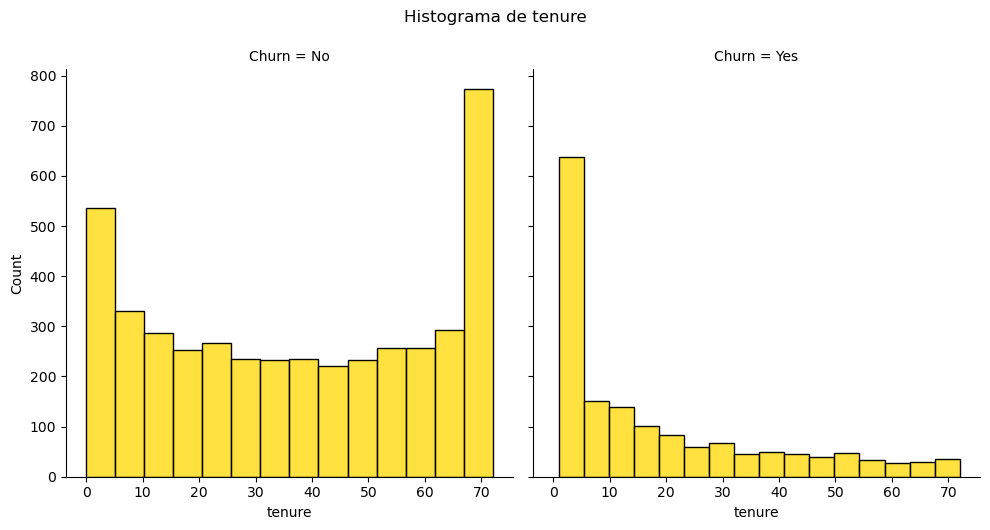

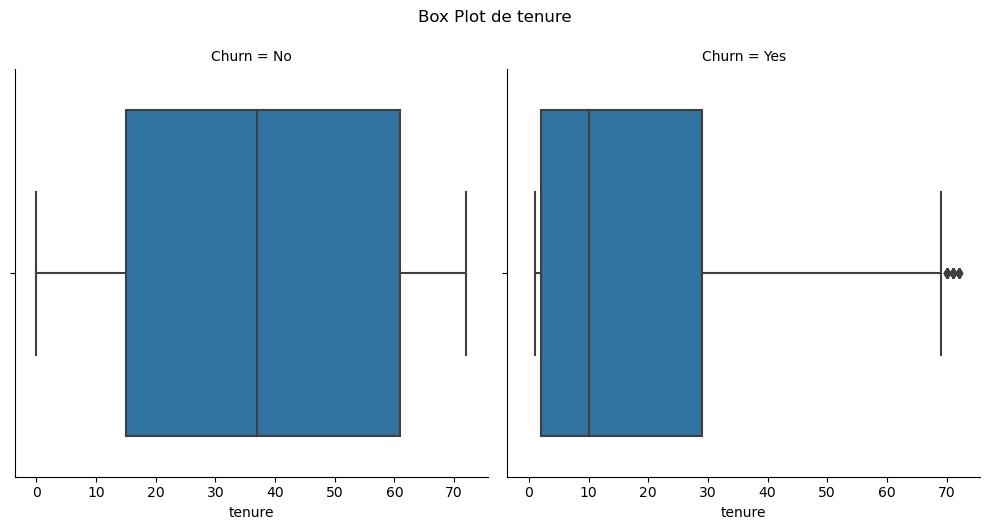

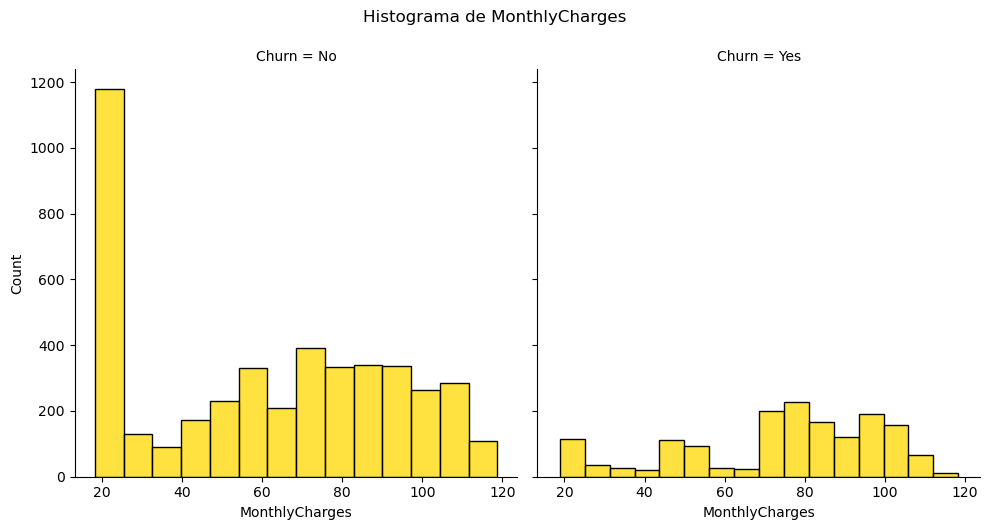

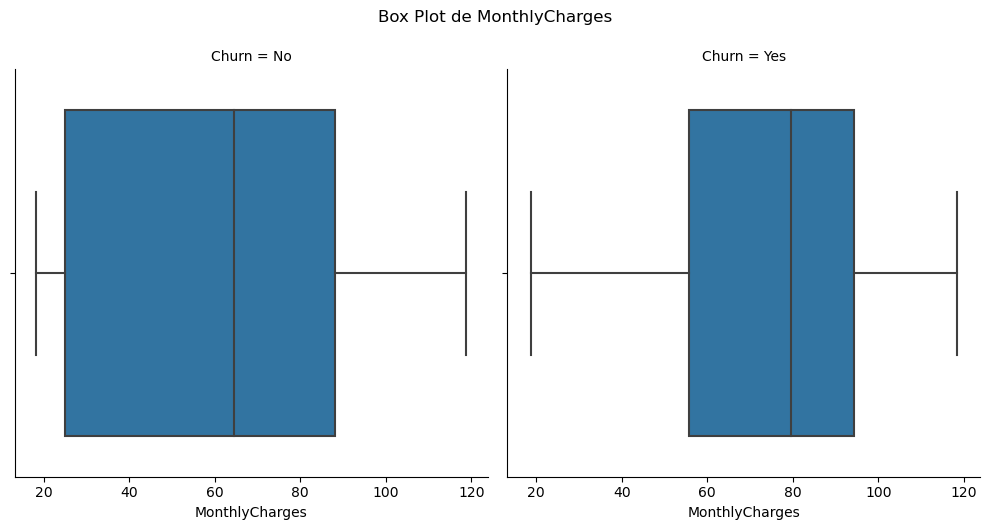

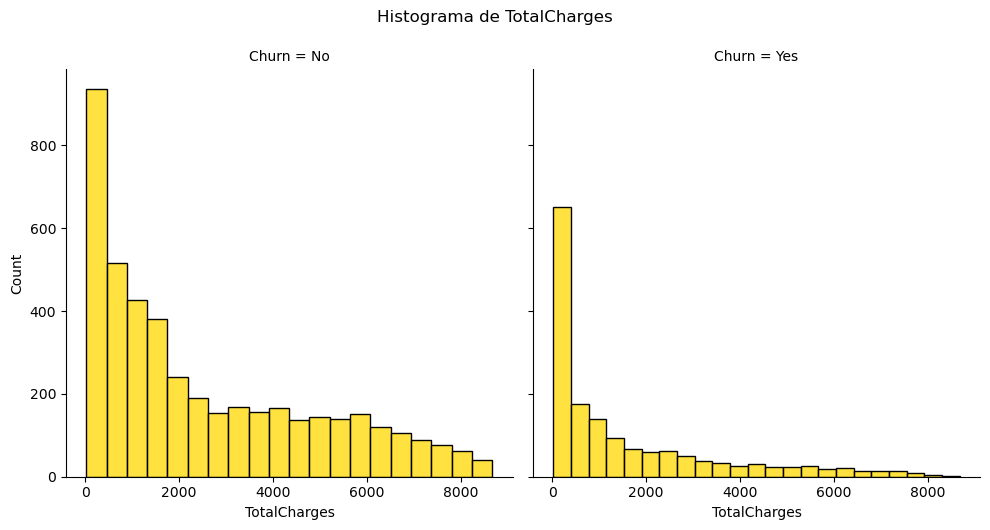

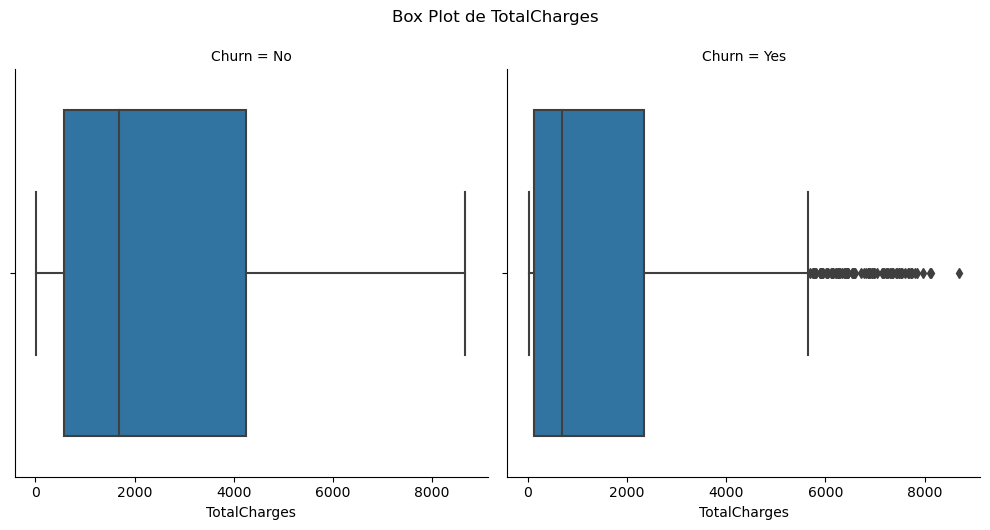

In [18]:

def plot_hist_box(data_df, column):
    # Crear una FacetGrid para el histograma, dividido por la columna "Churn"
    g_hist = sns.FacetGrid(data_df, col="Churn", height=5, aspect=1)
    g_hist.map(sns.histplot, column, color="gold")
    g_hist.fig.suptitle('Histograma de ' + column, y=1.05)

    # Crear una FacetGrid para el boxplot, también dividido por la columna "Churn"
    g_box = sns.FacetGrid(data_df, col="Churn", height=5, aspect=1)
    g_box.map(sns.boxplot, column, order=data_df["Churn"].unique())
    g_box.fig.suptitle('Box Plot de ' + column, y=1.05)

    plt.show()

# Iterar sobre las variables numéricas
for i, var in enumerate(numeric_columns):
    # Aplicar la función plot_hist_box
    plot_hist_box(churned_historic, var)

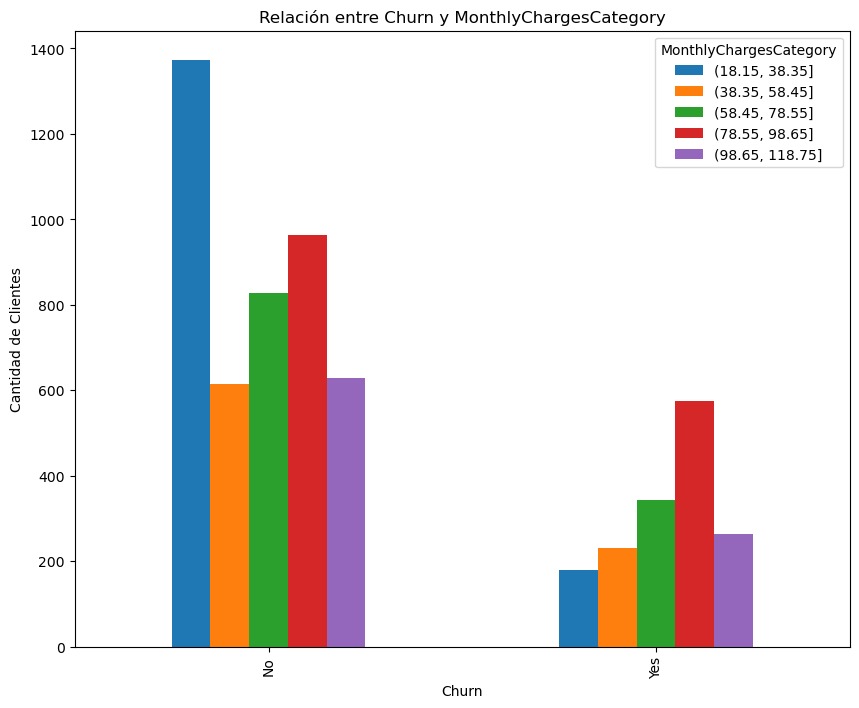

In [19]:
df = churned_historic.copy()
#  Se realiza una agrupación en 5 intervalos de la variable MonthlyCharges
df['MonthlyChargesCategory'] = pd.cut(df['MonthlyCharges'], bins=5)
# Crea una tabla de contingencia
contingency_table = pd.crosstab(df['Churn'], df['MonthlyChargesCategory'])
# Crea un gráfico de barras
ax = contingency_table.plot(kind='bar', figsize=(10, 8))
plt.title('Relación entre Churn y MonthlyChargesCategory')
plt.ylabel('Cantidad de Clientes')
plt.xlabel('Churn')
plt.show()

La tendencia muestra que los clientes cancelan más los planes de menor valor, en las categorías de 17.9 USD a 38.0 USD.

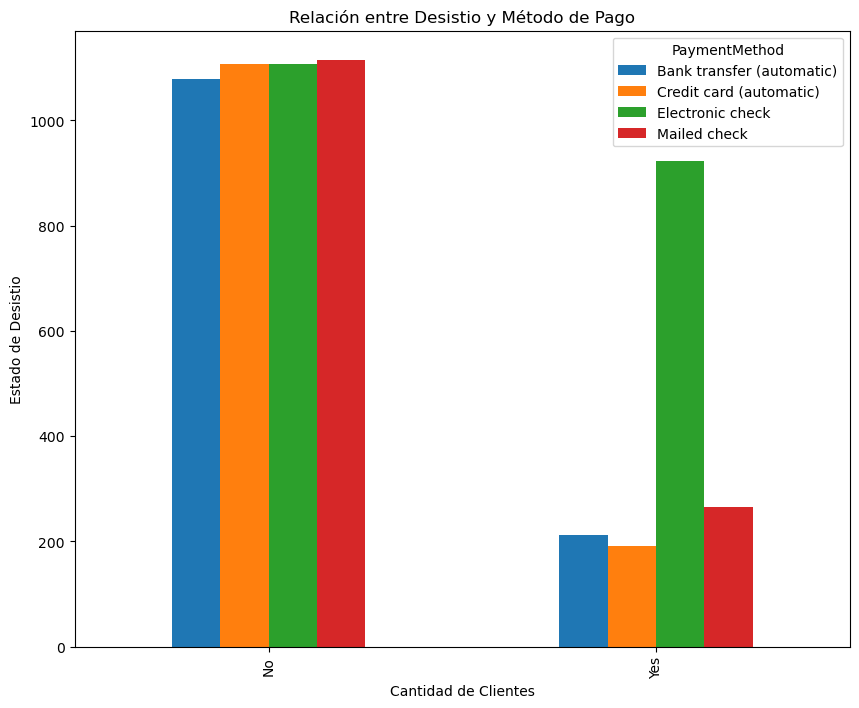

In [20]:
# Crea una tabla de contingencia entre Churn y PaymentMethod
contingency_table = pd.crosstab(df['Churn'], df['PaymentMethod'])
# Crea un gráfico de barras
ax = contingency_table.plot(kind='bar', figsize=(10, 8))
plt.title('Relación entre Desistio y Método de Pago')
plt.xlabel('Cantidad de Clientes')
plt.ylabel('Estado de Desistio')
plt.show()

En general, las personas tienen una alta tasa de retención en todas las categorías. Sin embargo, la mayoría de las personas que cancelan con cheque electrónico han decidido no continuar con ningún plan.

In [ ]:
from IPython.display import Markdown, display
from scipy import stats
def printmd(string):
    display(Markdown(string))

def calculate_chi_square(feature1, feature2='Churn'):
  printmd(f"Correlation between **{feature1}** and **{feature2}**")
  crosstab = pd.crosstab(churned_historic[feature1], churned_historic[feature2])
  # display(crosstab)
  stat, p, dof, expected = stats.chi2_contingency(crosstab,correction=True)

  print(f'p-value : {p}, degree of freedom: {dof}')


  # interpretar la estadística de prueba
  prob = 0.95
  critical = stats.chi2.ppf(prob, dof)
  print('probability=%.3f, critical=%.3f, stat=%.3f' % (prob, critical, stat))

  if abs(stat) >= critical:
    print('Se rechaza H0 (Dependiente)')
  else:
    print('No se rechaza H0 (Independiente)')

  # interpret p-value
  alpha = 1.0 - prob

  print('significance=%.3f, p=%.3f' % (alpha, p))
  if p <= alpha:
    print('Se rechaza H0 (Dependiente)')
  else:
    print('No se rechaza H0 (Independiente)')
  print('-----------------------------------\n')

In [ ]:
# Para las variables dicotómicas
colums_dicotomicas= ['PaperlessBilling', 'gender', 'Dependents', 'PhoneService', 'Partner','SeniorCitizen']

for col in colums_dicotomicas:
  calculate_chi_square(col)

Con un nivel de significancia del 5%, las variables 'PhoneService' y 'género' no son dependientes en relación a la variable objetivo Churn

In [ ]:
# Para las variables categóricas con más de dos categorías

colums_poly=['TechSupport', 'StreamingMovies', 'DeviceProtection', 'MultipleLines', 'Contract','InternetService', 'OnlineSecurity',
             'StreamingTV', 'PaymentMethod', 'OnlineBackup']
for col in colums_poly:
  calculate_chi_square(col)

Con un nivel de significancia del 5%, las variables con más de dos categorías presentan dependencia en relación a la variable objetivo Churn

Revisemos como se comportan las variables acorde al Coeficiente de incertidumbre
También conocida como U de Theil: una medida asimétrica de asociación entre características categóricas.

Al igual que la V de Cramer para U de Theil el valor de salida está en el rango de [0,1], donde 0 significa que la característica Y no proporciona información sobre la característica X, y 1 significa que la característica Y proporciona información completa sobre el valor de la característica X.

In [ ]:
import math

from collections import Counter

def conditional_entropy(x,y):
  # entropy of x given y
  y_counter = Counter(y)
  xy_counter = Counter(list(zip(x,y)))
  total_occurrences = sum(y_counter.values())
  entropy = 0
  for xy in xy_counter.keys():
      p_xy = xy_counter[xy] / total_occurrences
      p_y = y_counter[xy[1]] / total_occurrences
      entropy += p_xy * math.log(p_y/p_xy)
  return entropy

def theil_u(x,y):
  s_xy = conditional_entropy(x,y)
  x_counter = Counter(x)
  total_occurrences = sum(x_counter.values())
  p_x = list(map(lambda n: n/total_occurrences, x_counter.values()))
  s_x = stats.entropy(p_x)
  if s_x == 0:
      return 1
  else:
      return (s_x - s_xy) / s_x

In [ ]:
cat_cols = ['Churn','Contract', 'Dependents', 'DeviceProtection', 'InternetService', 'MultipleLines', 'OnlineBackup',
            'OnlineSecurity', 'PaperlessBilling', 'Partner', 'PaymentMethod', 'PhoneService', 'StreamingMovies',
            'StreamingTV', 'TechSupport', 'gender']

theilu = pd.DataFrame(index=['Churn'], columns=cat_cols)

for j in range(0,len(cat_cols)):
  u = theil_u(churned_historic['Churn'].tolist(),churned_historic[cat_cols[j]].tolist())
  theilu.loc[:,cat_cols[j]] = u

theilu.fillna(value=np.nan,inplace=True)
plt.figure(figsize=(20,1))
sns.heatmap(theilu,annot=True,fmt='.2f')
plt.show()

Contract, OnlineSecurity, TechSupport, tenure están moderadamente correlacionados con la variable Churn.

Se utilizarán las pruebas de Kolmogorov-Smirnov y Chi Cuadrado para determinar la significancia de las variables a ser incluidas en el modelado.

In [ ]:
df = churned_historic.copy()
df['Churn'] = df['Churn'].replace({'Yes': 1, 'No': 0})

In [ ]:
numerical_features = ['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']

ks_results = []
for f in numerical_features:
    if f in churned_historic.columns:  # Check if the column exists
        ks_stat, p_value = ks_2samp(df.loc[df["Churn"] == 1, f],
                                     df.loc[df["Churn"] == 0, f])
        ks_results.append({
            "Feature": f,
            "KS stat": ks_stat,
            "p-value": p_value
        })
pd.DataFrame(ks_results)

Dado que los p valores son pequeños nos indica que las variables pueden ser 
útiles para el modelo de clasificación a entrenar.

In [ ]:
categorical_features=['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod']

chi2_results = []
for f in categorical_features:
    onehot = OneHotEncoder(sparse=False)
    t = onehot.fit_transform(df[[f]])
    values = onehot.categories_[0]
    chi2_stats, p_values = chi2(t, df["Churn"])

    for value, chi_stat, p_value in zip(values, chi2_stats, p_values):
        chi2_results.append({
            "Feature": f,
            "Value": value,
            "Chi2 stat": chi_stat,
            "p-value": p_value
        })
pd.DataFrame(chi2_results)

In [ ]:
pd.set_option('display.max_rows', None)
data_df = pd.DataFrame(chi2_results, columns=['Feature',	'Value',	'Chi2 stat',	'p-value'])
data_df = data_df.sort_values('Chi2 stat', ascending=False)
print(data_df.head(5700))

Teniendo en cuenta los valores del estadístico χ² alto y un p valor bajo se considera más relevante para la tarea de clasificación las variables categóricas:   Contract, PaymentMethod, OnlineSecurity, TechSupport, InternetService, DeviceProtection, OnlineBackup, StreamingTV, StreamingMovies, PaperlessBilling, Dependents.

Por tanto, considero que las variables a tener en cuenta para el modelo de clasificación son: Contract, PaymentMethod, OnlineSecurity, TechSupport, InternetService, DeviceProtection, OnlineBackup, StreamingTV, StreamingMovies, PaperlessBilling, Dependents, SeniorCitizen, tenure, MonthlyCharges, TotalCharges.

## **3.4. Preprocesamiento de datos**

In [21]:
churn_df = churned_historic.copy()
test_df = churned_future.copy()

In [57]:
features = ['Contract','PaymentMethod','OnlineSecurity','TechSupport','InternetService', 'DeviceProtection','OnlineBackup','StreamingTV','StreamingMovies','PaperlessBilling','Dependents','SeniorCitizen','tenure','MonthlyCharges','TotalCharges']

In [58]:
# Convierte la columna 'TotalCharges' a números flotantes
test_df['TotalCharges'] = pd.to_numeric(test_df['TotalCharges'], errors='coerce')

# Calcula la media de 'TotalCharges' excluyendo los NaN
mean_total_charges = test_df['TotalCharges'].mean()

# Reemplaza los NaN (valores que no se pudieron convertir) por la media
test_df['TotalCharges'].fillna(mean_total_charges, inplace=True)

In [106]:
# Identificar columnas numéricas y categóricas
numerical_features =  ['TotalCharges']
categorical_features = ['Contract','PaymentMethod','OnlineSecurity']

# Define the transformer for numerical features
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

# Define the transformer for categorical features
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

# Combine transformers into a ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)])

# Create the complete pipeline
baseline_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('classifier', LogisticRegression(solver="liblinear", class_weight="balanced", random_state=42))])

## **4. Entrenamiento de un modelo Baseline** <a class="anchor" id="section4"></a>

In [107]:
for column in test_df:
    try:
        type_column = churn_df[column].dtypes
        test_df[column].astype(type_column)
    except:
        print(column)

In [108]:
from sklearn.metrics import classification_report, confusion_matrix

baseline_pipeline.fit(churn_df[features], churn_df['Churn'])

joblib.dump(baseline_pipeline, 'baseline_model.joblib')
# Make predictions
y_pred = baseline_pipeline.predict(test_df[features])

# Print classification report and confusion matrix
print(classification_report(test_df["Churn"], y_pred))
print(confusion_matrix(test_df["Churn"], y_pred))

              precision    recall  f1-score   support

           0       0.92      0.65      0.76       735
           1       0.47      0.84      0.60       265

    accuracy                           0.70      1000
   macro avg       0.69      0.75      0.68      1000
weighted avg       0.80      0.70      0.72      1000

[[481 254]
 [ 43 222]]


## **5. Selección automática del mejor modelo** <a class="anchor" id="section5"></a>

Se define trabajar con los siguientes algoritmos de clasificación regresión logística, Random Forest y SVC.

Se define encontrar el mejor modelo a partir de la métrica f1

In [109]:
churn_df["Churn"] = churn_df["Churn"].replace({"Yes": 1, "No": 0})
test_df["Churn"] = test_df["Churn"].replace({"Yes": 1, "No": 0})


In [110]:
# Lista de modelos para iterar
modelos = [
    ("Random Forest", RandomForestClassifier(random_state=42)),
    ("Logistic Regression", LogisticRegression(random_state=42)),
    ("SVC", SVC(random_state=42))
]

In [111]:
param_grid_lr = {
    'classifier__C': [0.1, 1, 10],
    'classifier__penalty': ['l1', 'l2']
}

param_grid_rf = {
    'classifier__n_estimators': [10, 100, 200],
    'classifier__max_depth': [None, 10, 20]
}

param_grid_svc = {
    'classifier__C': [0.1, 1, 10],
    'classifier__kernel': ['linear', 'rbf']
}

In [112]:
models_params = [
    (LogisticRegression(solver="liblinear", class_weight="balanced", random_state=42), param_grid_lr),
    (RandomForestClassifier(class_weight="balanced", random_state=42), param_grid_rf),
    (SVC(class_weight="balanced",probability=True, random_state=42), param_grid_svc)
]


pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('classifier', None)])

In [113]:
for model, param_grid in models_params:
    pipeline.set_params(classifier=model)
    
    grid = GridSearchCV(estimator=pipeline, param_grid=param_grid, scoring=["precision", "recall", "f1", "roc_auc"], refit="f1", cv=5, return_train_score=True)
    grid.fit(churn_df[features], churn_df["Churn"])
    grid.best_params_

In [114]:
best_results_df = pd.DataFrame(grid.cv_results_).iloc[grid.best_index_].reset_index().rename(columns={"index": "result", grid.best_index_: "value"})
best_results_df = best_results_df.loc[best_results_df["result"].str.contains("split")]
[best_results_df["split"], best_results_df["dataset"], best_results_df["metric"]] = zip(*best_results_df["result"].str.split("_"))
best_results_df["dataset"].replace({"test": "validation"}, inplace=True)
del best_results_df["result"]

In [115]:
best_model = grid.best_estimator_

joblib.dump(best_model, 'best_model.joblib')

['best_model.joblib']

In [116]:
best_model

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['TotalCharges']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Contract', 'PaymentMethod',
                                                   'OnlineSecurity'])])),
                ('classifier',
                 SVC(C=0.1, class_weight='balanced', probability=True,
                     random_state=42))])

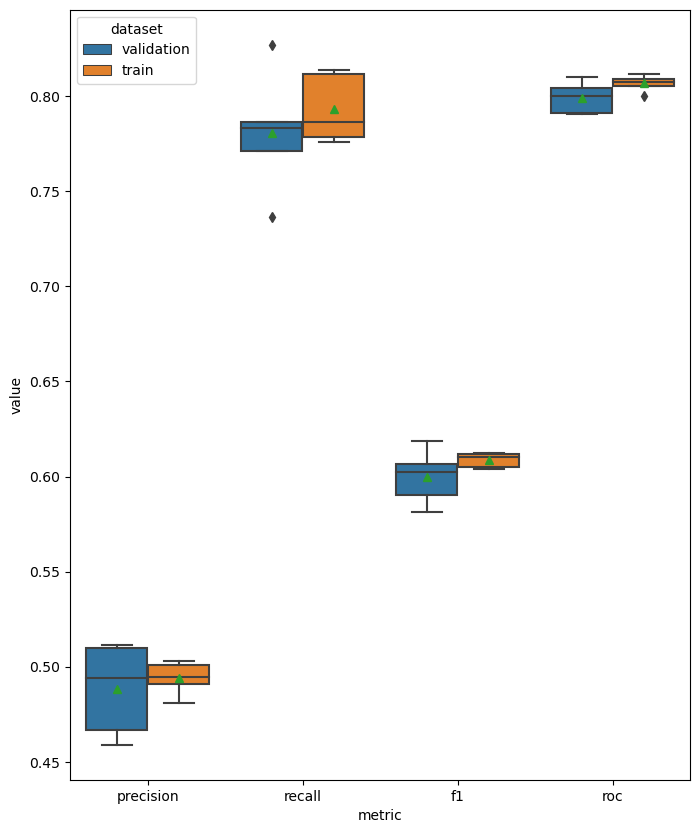

In [117]:
plt.figure(figsize=(8, 10))
sns.boxplot(data=best_results_df, y="value", x="metric", hue="dataset", showmeans=True)
plt.show()

In [118]:
from joblib import dump

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import ks_2samp
from sklearn.feature_selection import chi2

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder
from sklearn.preprocessing import PolynomialFeatures
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, RocCurveDisplay
from sklearn.metrics import precision_score, recall_score, f1_score, roc_curve, roc_auc_score, auc

#from pandas_profiling import ProfileReport

In [119]:
train_val_preds = grid.best_estimator_.predict(churn_df[features])
test_preds = grid.best_estimator_.predict(test_df[features])

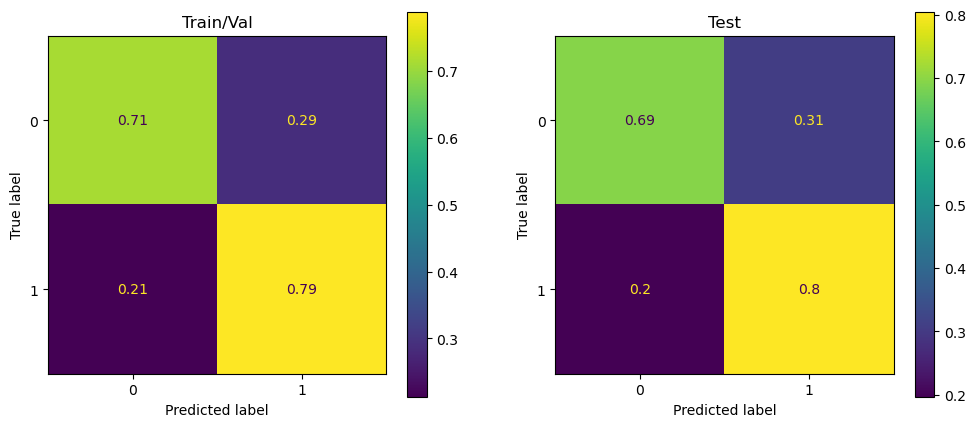

In [120]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

train_val_cm = confusion_matrix(churn_df["Churn"], train_val_preds, labels=grid.best_estimator_.classes_, normalize="true")
train_val_disp = ConfusionMatrixDisplay(confusion_matrix=train_val_cm, display_labels=grid.best_estimator_.classes_)
train_val_disp.plot(ax=axes[0])
axes[0].set_title("Train/Val")

test_cm = confusion_matrix(test_df["Churn"], test_preds, labels=grid.best_estimator_.classes_, normalize="true")
test_disp = ConfusionMatrixDisplay(confusion_matrix=test_cm, display_labels=grid.best_estimator_.classes_)
test_disp.plot(ax=axes[1])
axes[1].set_title("Test")

plt.show()

Text(0.5, 1.0, 'Test')

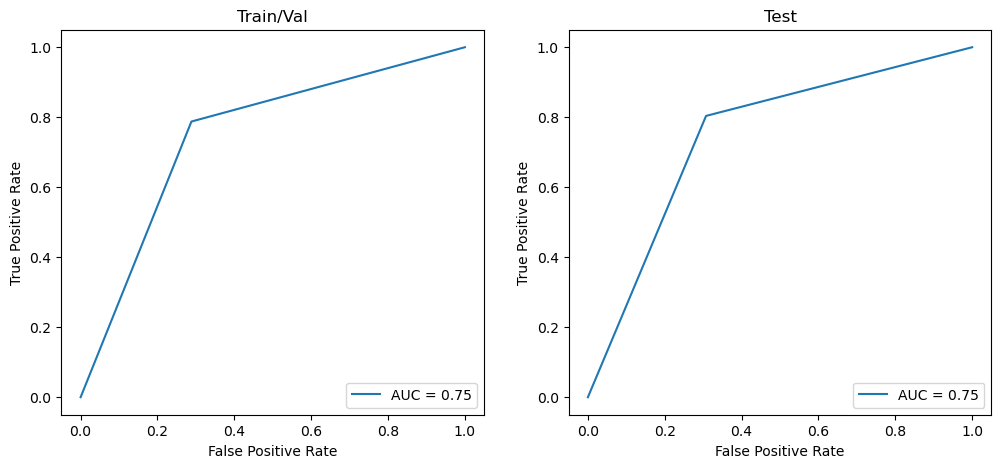

In [121]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

fpr, tpr, thresholds = roc_curve(churn_df["Churn"], train_val_preds)
area = auc(fpr, tpr)
train_val_disp = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=area)
train_val_disp.plot(ax=axes[0])
axes[0].set_title("Train/Val")

fpr, tpr, thresholds = roc_curve(test_df["Churn"], test_preds)
area = auc(fpr, tpr)
test_disp = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=area)
test_disp.plot(ax=axes[1])
axes[1].set_title("Test")

In [122]:
test_probs = grid.best_estimator_.predict_proba(test_df[features])[:,1]
probs_true_df = pd.DataFrame(np.append(test_probs.reshape(-1, 1), test_df["Churn"].values.reshape(-1, 1), axis=1), columns=["probs", "true"])

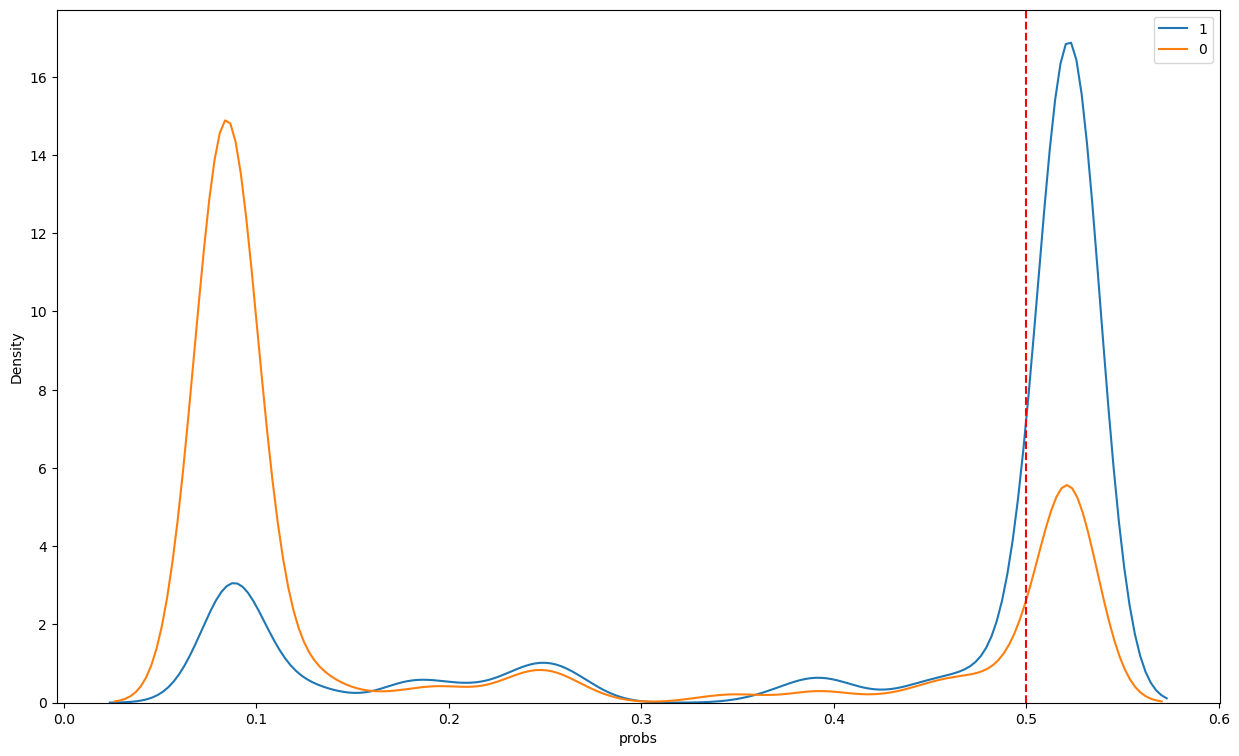

In [123]:
plt.figure(figsize=(15, 9))
sns.kdeplot(data=probs_true_df.loc[probs_true_df["true"] == 1], x="probs", bw_adjust=.3, label="1")
sns.kdeplot(data=probs_true_df.loc[probs_true_df["true"] == 0], x="probs", bw_adjust=.3, label="0")
plt.axvline(x=.5, color="r", linestyle="--")
plt.legend()
plt.show()

In [124]:
dump(grid.best_estimator_, "./churn-v1.0.joblib")

['./churn-v1.0.joblib']

 #  5.1 shap values

In [81]:
pip install shap matplotlib mpld3

Note: you may need to restart the kernel to use updated packages.


In [88]:
import shap
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
import mpld3

In [125]:
# Identificar columnas numéricas y categóricas
numerical_features = ['MonthlyCharges']
categorical_features = ['Contract', 'PaymentMethod', 'OnlineSecurity']

In [126]:
X_t = pd.DataFrame(
    grid.best_estimator_["preprocessor"].fit_transform(test_df[features]),
    columns=[f.split("__")[1] for f in grid.best_estimator_["preprocessor"].get_feature_names_out()]
)

In [127]:
def model(X):
    return grid.best_estimator_["classifier"].predict_proba(X)[:,1]

explainer = shap.Explainer(model, X_t)
shap_values = explainer(X_t)

X has feature names, but SVC was fitted without feature names
X has feature names, but SVC was fitted without feature names
X has feature names, but SVC was fitted without feature names
X has feature names, but SVC was fitted without feature names
X has feature names, but SVC was fitted without feature names
X has feature names, but SVC was fitted without feature names
X has feature names, but SVC was fitted without feature names
X has feature names, but SVC was fitted without feature names
X has feature names, but SVC was fitted without feature names
X has feature names, but SVC was fitted without feature names
X has feature names, but SVC was fitted without feature names
X has feature names, but SVC was fitted without feature names
X has feature names, but SVC was fitted without feature names
X has feature names, but SVC was fitted without feature names
X has feature names, but SVC was fitted without feature names
X has feature names, but SVC was fitted without feature names
X has fe

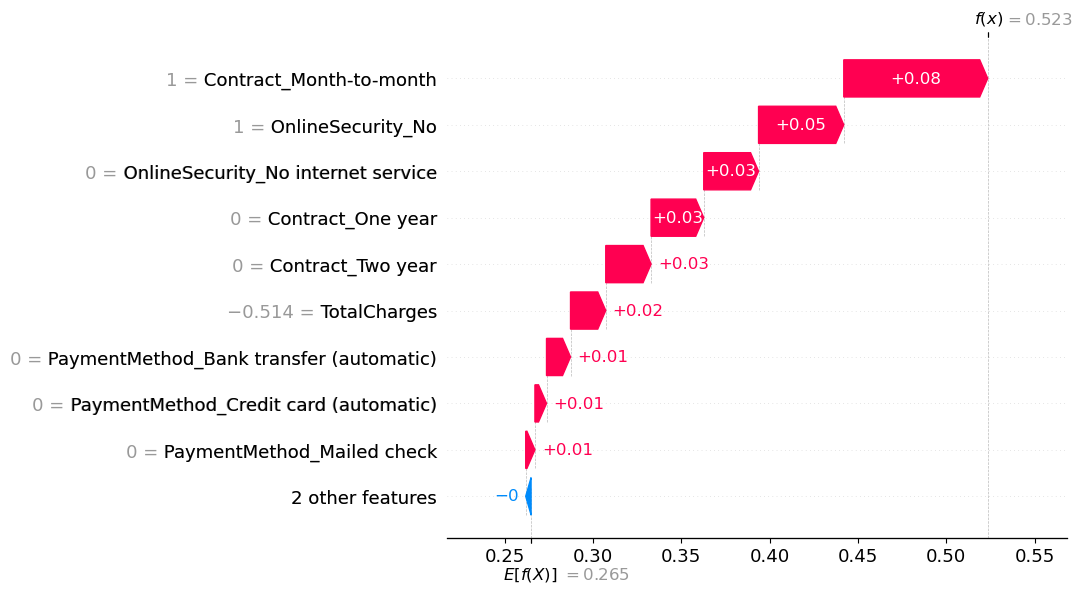

In [128]:
shap.plots.waterfall(shap_values[837])

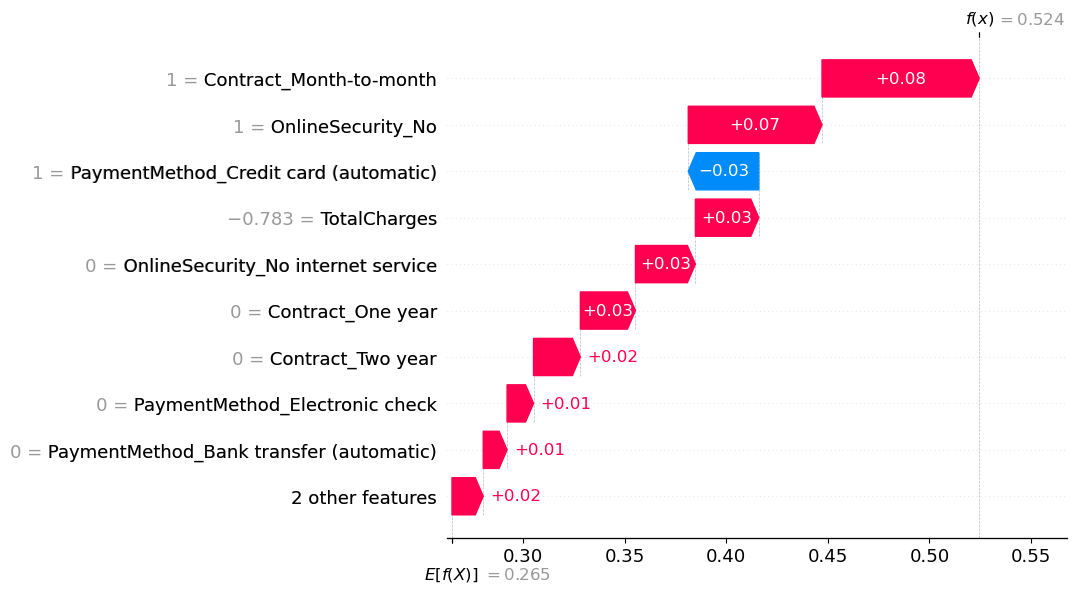

In [129]:
shap.plots.waterfall(shap_values[148])

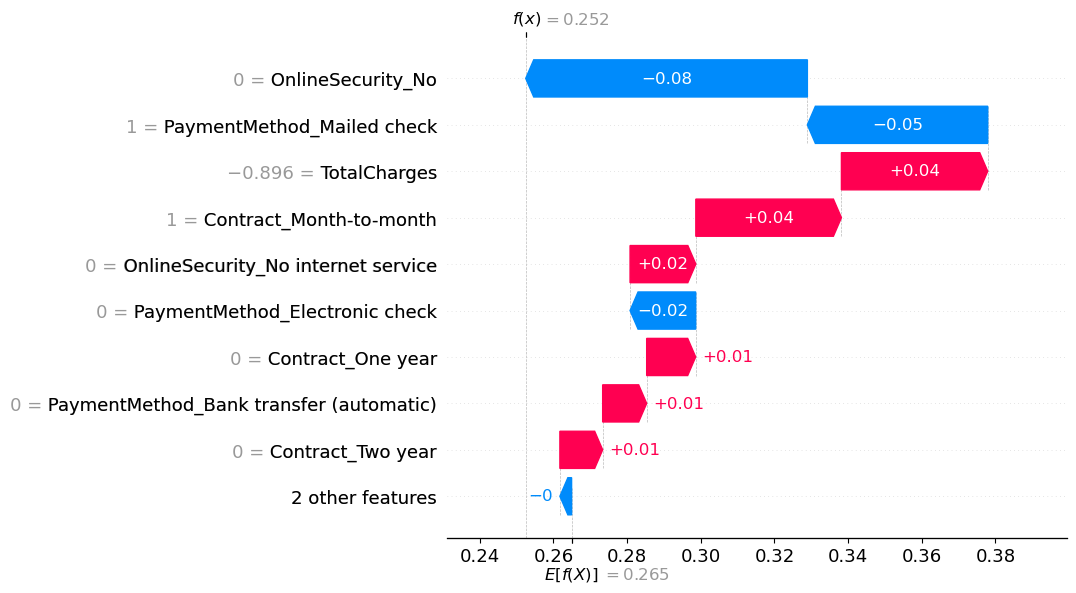

In [130]:
shap.plots.waterfall(shap_values[4])

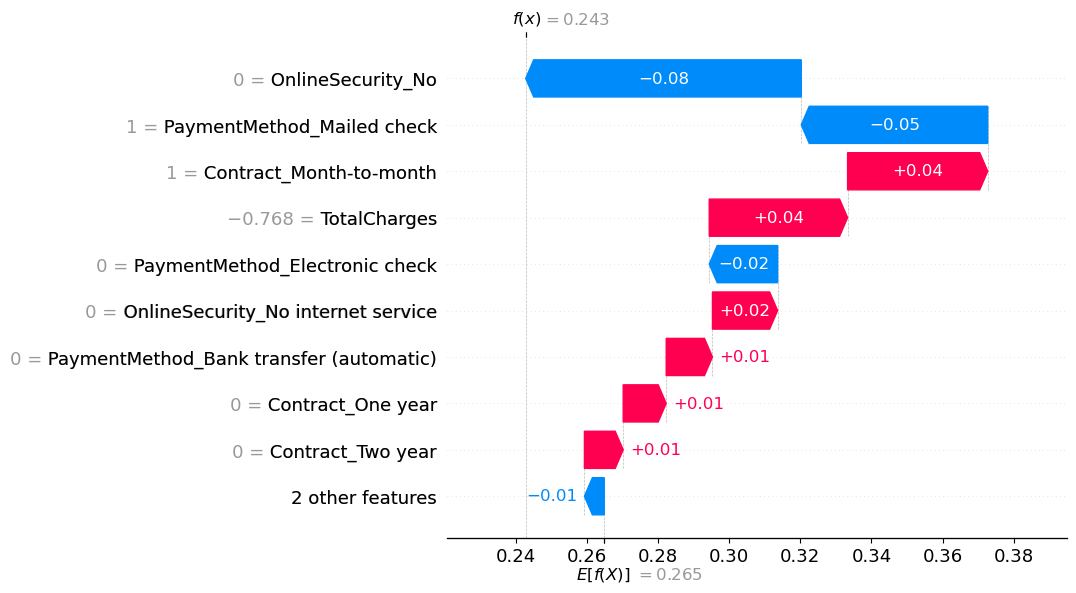

In [131]:
shap.plots.waterfall(shap_values[7])

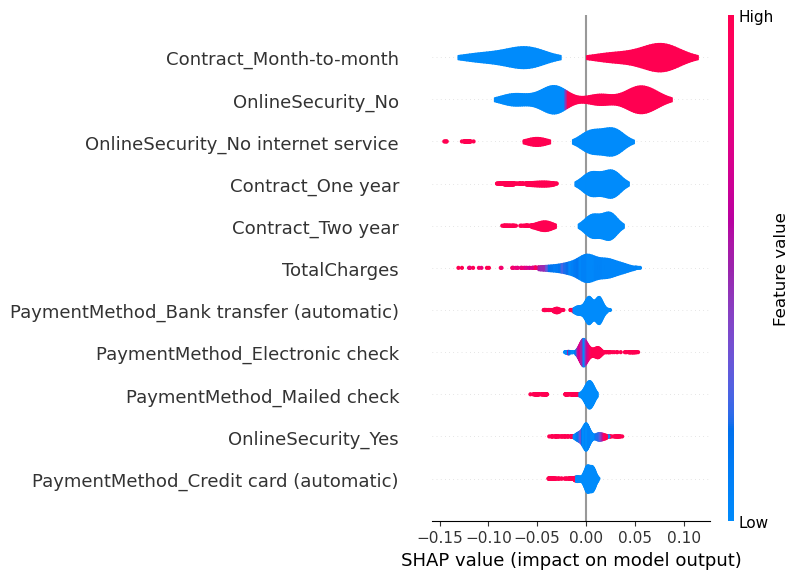

In [132]:
shap.summary_plot(shap_values, plot_type="violin")